In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import itertools


In [2]:
global_data = {}
length_values = 60


uni_label = ["noise",
"youtube",
"messenger" ,
"twitch" ,
"skype" ,
"spotify"]

In [4]:

def merge_data(filename, global_data) :
    
    data = pd.read_csv(filename)
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    data["label"] = data["label"].replace(to_replace = "pure_noise", value = "noise")
    #data.drop(columns={})
    data.set_index(pd.to_datetime(data.Time), inplace=True)
    
    id_acquis = data.id_acquisition.iloc[0]
    
    for val in tqdm(data.connection_id.unique()):
        current_data = data[data.connection_id==val]
        label = current_data.label.value_counts(sort = True, ascending =False).index[0]

        global_data[f"{id_acquis}_{val}"]=(current_data.index, current_data.TBS_2,label)


    return global_data

def reformat_data(global_data) :
    res_n, res_dura, labels = [],[],[]
    for key, value in tqdm(global_data.items()) :
        res_n.append(len(value[0]))
        dura = (value[0][-1]-value[0][0]).total_seconds()
        res_dura.append(dura)

        labels.append(value[2])

    df = pd.DataFrame({"Duration(s)" : res_dura, "Duration(measures)" : res_n, "label" : labels})   
    return df

def plot_histo(data) : 
    bins = 10*np.exp(np.arange(0,9,0.5))
    bins = np.insert(bins, 0, 0)
    fig, ax = plt.subplots(figsize=(16,16))
    
    vals = []
    for lab in uni_label :
        current_data = data[data["label"]==lab]["Duration(s)"]
        vals.append(current_data.values)
    new_data = np.array(vals)
    print(new_data.shape)
    plt.hist(new_data,stacked=True, bins=bins, alpha = 0.9)
    
    ax.set_xscale('log')
    ax.set_xlabel("Duration (s)")
    ax.set_ylabel("Proportion")
    ax.set_title("Measures duration Distribution")
    ax.legend(uni_label)

In [5]:
directory_data = "../Mesures/train"
datasets_train = [i for i in os.listdir(directory_data) if i.endswith(".csv") ]


for i, data in enumerate(datasets_train) :
    file = os.path.join(directory_data,data)
    print(f"Extracting {file}.... {i+1}/{len(datasets_train)}")
    global_data = merge_data(file, global_data)
    
df_train = reformat_data(global_data)
df_train

Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/36


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 50.63it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/36


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 40.53it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/36


100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 104.56it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/36


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 13.53it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/36


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.92it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 6/36


100%|███████████████████████████████████████████████████████████████████████████████| 839/839 [00:01<00:00, 667.34it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 7/36


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.41it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 8/36


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 39.21it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 9/36


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.08it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 10/36


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.60it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 11/36


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 16.69it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 12/36


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 33.48it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 13/36


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.45it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 14/36


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.82it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 15/36


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:12<00:00, 135.85it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 16/36


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 887.11it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 17/36


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 121.31it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 18/36


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.36it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 19/36


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:01<00:00, 76.29it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 20/36


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 136.06it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 21/36


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 162.07it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 22/36


100%|███████████████████████████████████████████████████████████████████████████████| 427/427 [00:01<00:00, 403.98it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 23/36


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 400.11it/s]

Extracting ../Mesures/train\youtube20221108_182416.csv.... 24/36


Extracting ../Mesures/train\youtube20221124_125524.csv.... 25/36


100%|███████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 812.26it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 26/36


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 795.22it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 27/36


  0%|                                                                                           | 0/95 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230110_145404.csv.... 28/36


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 623.86it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 29/36


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 745.79it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 30/36


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 541.05it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 31/36


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 570.15it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 32/36


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 553.53it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 33/36


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 716.19it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 34/36


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 209.98it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 35/36


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 213.04it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 36/36


100%|████████████████████████████████████████████████████████████████████████████| 5270/5270 [00:05<00:00, 1052.36it/s]


,Duration(s),Duration(measures),label
0,2777.818,364319,messenger
1,0.077,11,messenger
2,0.077,11,messenger
3,9.331,1230,messenger
4,9.427,1229,messenger
...,...,...,...
5265,10.935,767,youtube
5266,13.525,939,youtube
5267,17.445,1002,youtube
5268,12.425,1029,youtube


<ipython-input-4-a96e4c66e94d>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(vals)


(6,)


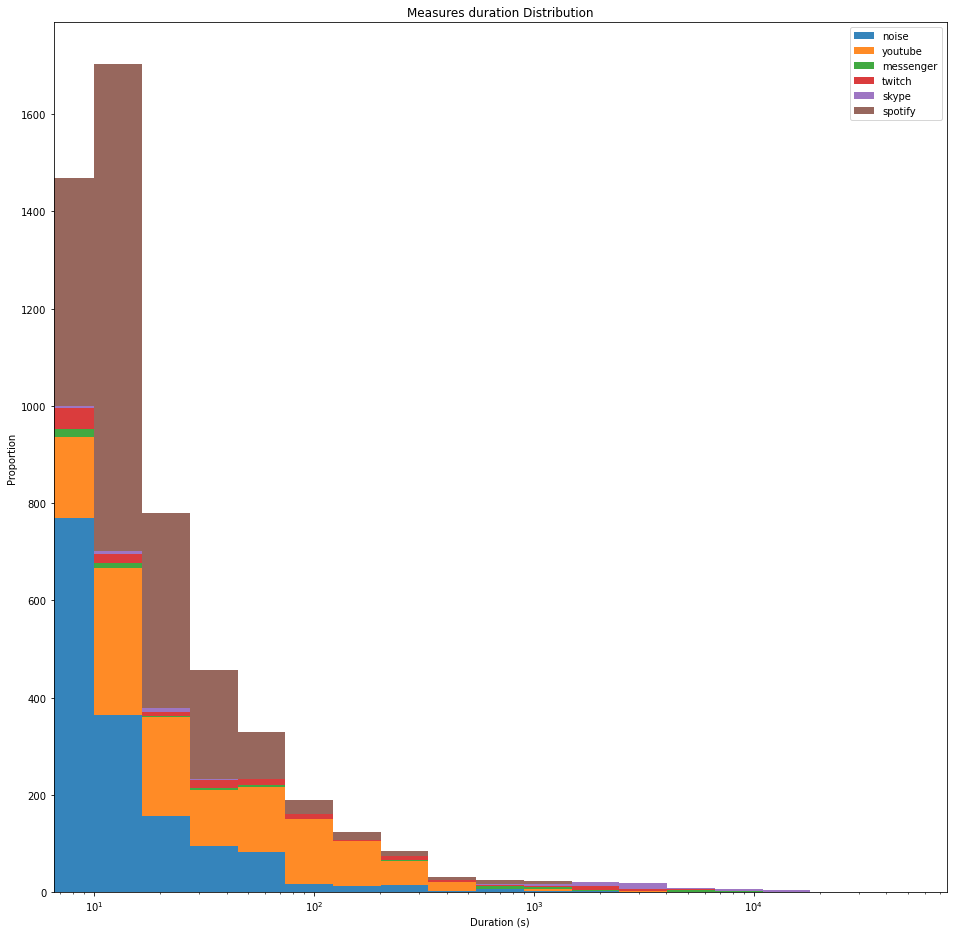

In [6]:
plot_histo(df_train)

In [8]:
directory_data = "../Mesures/test"
datasets_test = [i for i in os.listdir(directory_data) if i.endswith(".csv") ]

global_data = {}
for i, data in enumerate(datasets_test) :
    file = os.path.join(directory_data,data)
    print(f"Extracting {file}.... {i+1}/{len(datasets_test)}")
    global_data = merge_data(file, global_data)
    
df_test = reformat_data(global_data)
df_test

Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/6


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.44it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 2/6


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.35it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 3/6


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 765.99it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 4/6


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 28.08it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 5/6


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 802.48it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 6/6


100%|█████████████████████████████████████████████████████████████████████████████| 738/738 [00:00<00:00, 33667.94it/s]


,Duration(s),Duration(measures),label
0,1476.499,207461,messenger
1,1478.364,176772,messenger
2,13.897,225,messenger
3,1458.168,223311,messenger
4,1436.634,214612,messenger
...,...,...,...
733,10.171,30,youtube
734,21.255,563,youtube
735,21.815,541,youtube
736,107.245,2991,youtube


<ipython-input-4-a96e4c66e94d>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data = np.array(vals)


(6,)


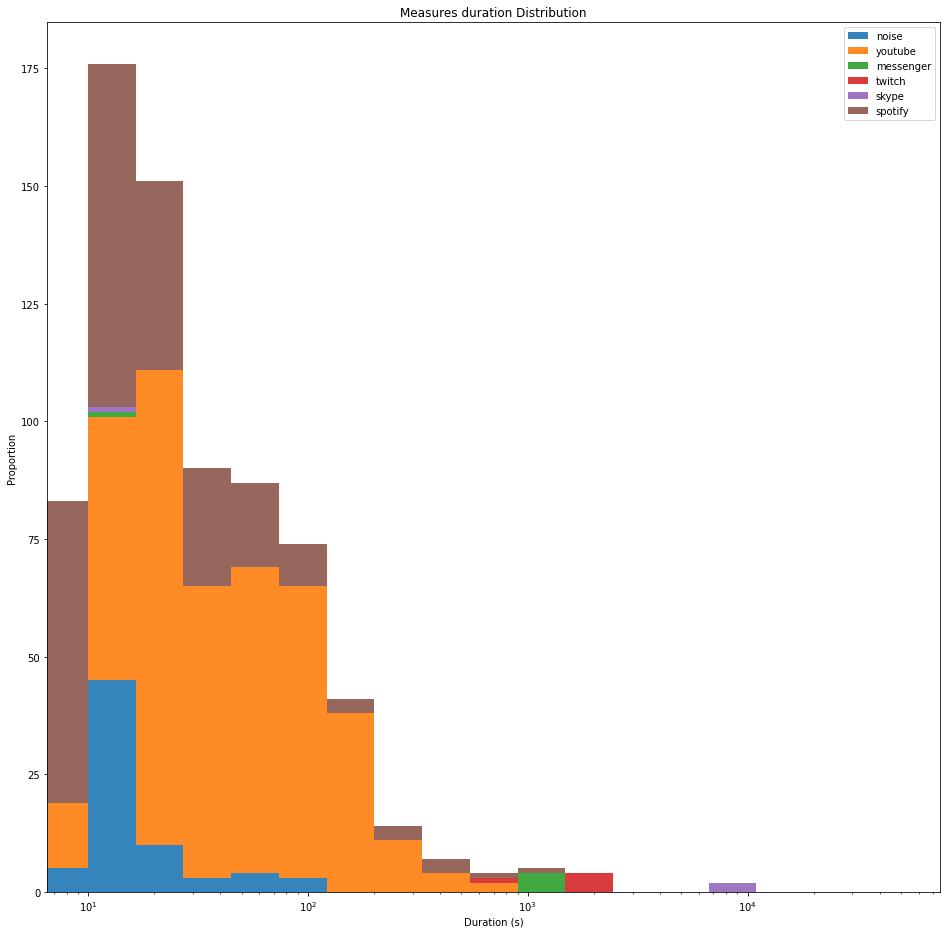

In [9]:
plot_histo(df_test)